In [77]:
import pandas as pd
sentiment = pd.read_csv("fear_greed.csv")    
trades = pd.read_csv("historical_data.csv") 

Preprocess Data for Visualizations

In [78]:

sentiment['date'] = pd.to_datetime(sentiment['timestamp'], unit='s')

trades['date'] = pd.to_datetime(trades['Timestamp'].astype('int64'), unit='ms')


In [79]:
trades['Size USD'] = pd.to_numeric(trades['Size USD'], errors='coerce')
trades['Closed PnL'] = pd.to_numeric(trades['Closed PnL'], errors='coerce')
trades['date'] = pd.to_datetime(trades['Timestamp IST'], format='%d-%m-%Y %H:%M')
trades['date_only'] = trades['date'].dt.date
sentiment['date_only'] = sentiment['date'].dt.date
daily_volume = trades.groupby('date_only')['Size USD'].sum().reset_index()
daily_pnl = trades.groupby('date_only')['Closed PnL'].sum().reset_index()
merged = pd.merge(
    sentiment[['date_only','value','classification']],
    daily_pnl,
    on='date_only',
    how='inner'
)
# normalize dates to full datetime for plotting & alignment
merged['date'] = pd.to_datetime(merged['date_only'])



Sentiment Trend Over Time

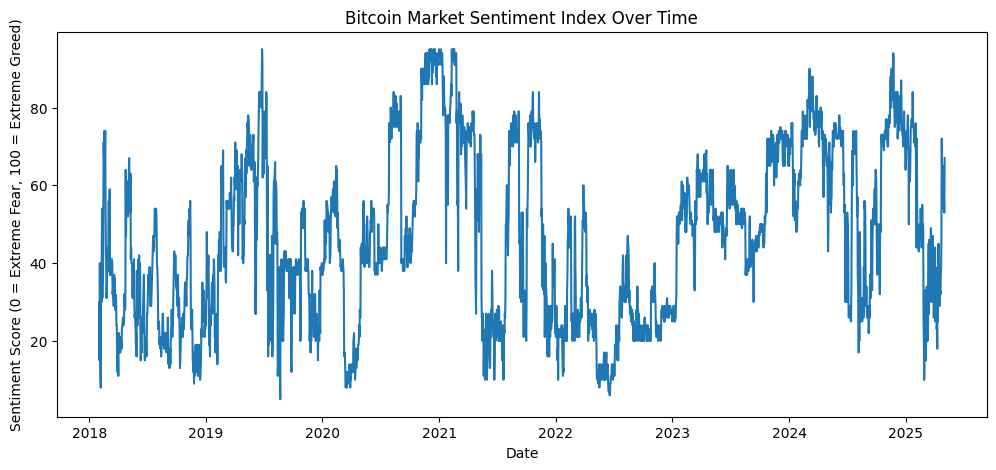

In [80]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(sentiment['date'], sentiment['value'])
plt.title("Bitcoin Market Sentiment Index Over Time")
plt.xlabel("Date")
plt.ylabel("Sentiment Score (0 = Extreme Fear, 100 = Extreme Greed)")
plt.show()


Count of Market Sentiment States

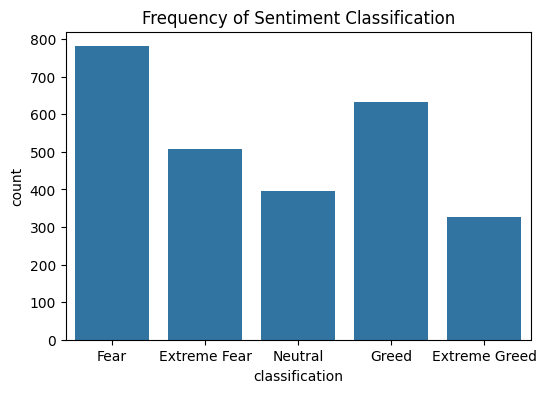

In [81]:
import seaborn as sns
plt.figure(figsize=(6,4))
sns.countplot(data=sentiment, x='classification')
plt.title("Frequency of Sentiment Classification")
plt.show()


Trade Volume Over Time

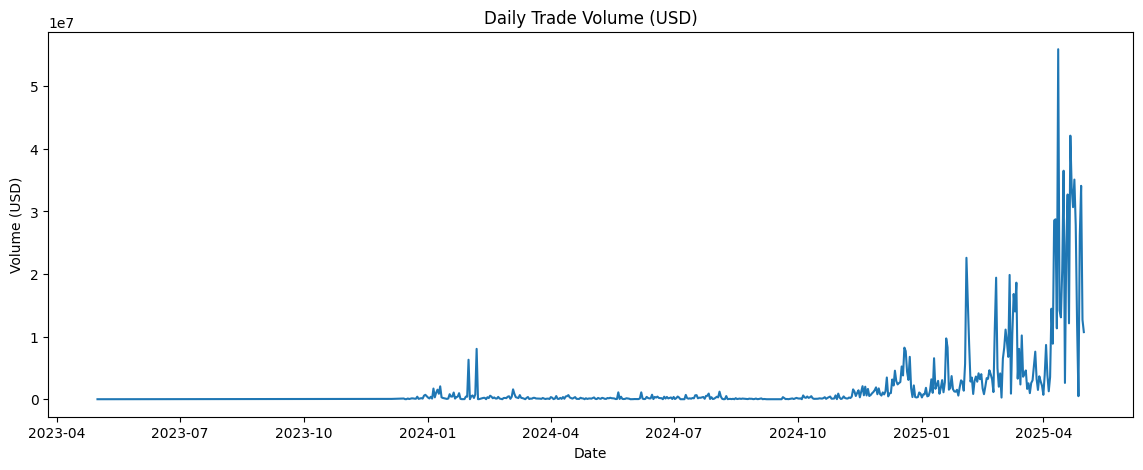

In [82]:
trades['trade_usd'] = trades['Size USD'] 

daily_volume = trades.groupby(trades['date'].dt.date)['trade_usd'].sum().reset_index()

plt.figure(figsize=(14,5))
plt.plot(daily_volume['date'], daily_volume['trade_usd'])
plt.title("Daily Trade Volume (USD)")
plt.xlabel("Date")
plt.ylabel("Volume (USD)")
plt.show()


Daily Total PnL Trend

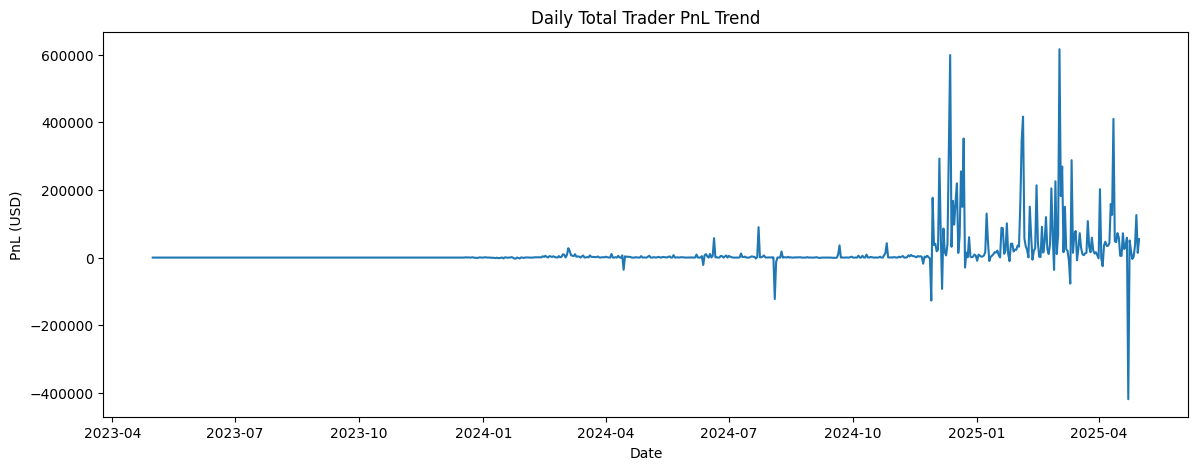

In [83]:
daily_pnl = trades.groupby(trades['date'].dt.date)['Closed PnL'].sum().reset_index()

plt.figure(figsize=(14,5))
plt.plot(daily_pnl['date'], daily_pnl['Closed PnL'])
plt.title("Daily Total Trader PnL Trend")
plt.xlabel("Date")
plt.ylabel("PnL (USD)")
plt.show()


Overlay Market Sentiment & Profit

In [84]:

trades['date'] = pd.to_datetime(trades['Timestamp IST'], format="%d-%m-%Y %H:%M")

trades['date_only'] = trades['date'].dt.normalize()


In [85]:
sentiment['date_only'] = sentiment['date'].dt.normalize()


In [86]:
daily_pnl = trades.groupby('date_only')['Closed PnL'].sum().reset_index()


In [87]:
merged = pd.merge(
    sentiment[['date_only','value','classification']],
    daily_pnl,
    on='date_only',
    how='inner'
)


In [88]:
merged.rename(columns={'date_only':'date'}, inplace=True)


Plot Sentiment vs Trader Profitability

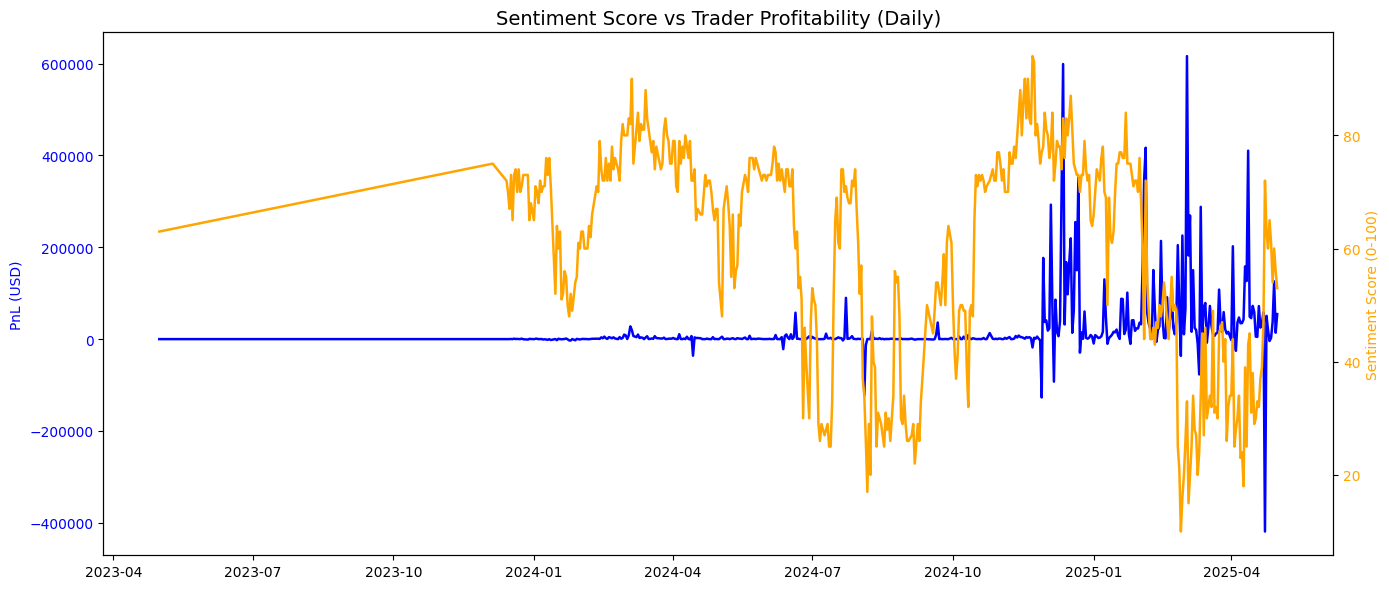

In [89]:

merged['date'] = pd.to_datetime(merged['date'])

fig, ax1 = plt.subplots(figsize=(14,6))

ax1.plot(merged['date'], merged['Closed PnL'], color='blue', linewidth=1.8, label='Daily PnL')
ax1.set_ylabel("PnL (USD)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(merged['date'], merged['value'], color='orange', linewidth=1.8, label='Sentiment Score (0-100)')
ax2.set_ylabel("Sentiment Score (0-100)", color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title("Sentiment Score vs Trader Profitability (Daily)", fontsize=14)
fig.tight_layout()
plt.show()


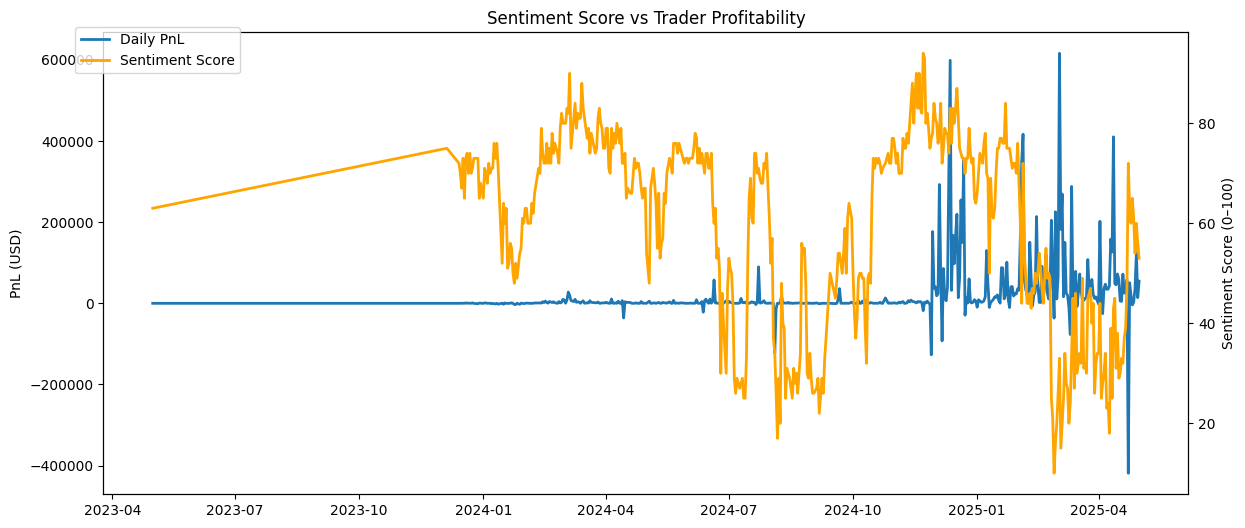

In [90]:
fig, ax1 = plt.subplots(figsize=(14,6))

ax2 = ax1.twinx()

ax1.plot(merged['date'], merged['Closed PnL'], label='Daily PnL', linewidth=2)
ax2.plot(merged['date'], merged['value'], color='orange', label='Sentiment Score', linewidth=2)

ax1.set_ylabel("PnL (USD)")
ax2.set_ylabel("Sentiment Score (0–100)")

plt.title("Sentiment Score vs Trader Profitability")

fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9))
plt.show()
